In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
# from sklearn.ensemble import RandomForestClassifier #for the model
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import export_graphviz #plot tree
# from sklearn.metrics import roc_curve, auc #for model evaluation
# from sklearn.metrics import classification_report #for model evaluation
# from sklearn.metrics import confusion_matrix #for model evaluation
# from sklearn.model_selection import train_test_split #for data splitting
np.random.seed(1) #ensure reproducibility

pd.options.mode.chained_assignment = None 

In [7]:
import dame_flame
import random

## Data Cleaning (CREATING flame_enrollment.csv)

In [ ]:
# We start with a dataset that has registry data merged with unequal commute features data (LIFT_registry_UCMerged)

In [27]:
card = pd.read_csv("/Users/albertsun/Projects/data/LIFT_registry_2022-03-22.csv")
len(set(card["card_id"].str[:-2]))

98228

In [4]:
# Before rebinning UC covariates
LIFT_reg = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_registry_UCMerged.csv")
LIFT_reg

,Unnamed: 0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,GEOID,Initial Load,Study Card,card_id,OverallJobAccess_D,lowwagelaborforce_D,Access30Transit_D,Access30Transit_ts_D,spatialmismatch_D
0,0,36,Black or African American,Other,8/31/2019,2017-06-15,KCMCCS,530330288022,NaN,NaN,568-1,4,3,1,1,2
1,1,31,White,English,12/31/2018,2017-05-04,Promo Account,530330288022,NaN,NaN,7672-1,4,3,1,1,2
2,2,33,White,English,3/31/2021,2019-04-08,WithinReach,530330288022,NaN,NaN,7672-2,4,3,1,1,2
3,3,33,White,English,8/31/2019,2017-06-27,KCMCCS,530330288022,NaN,NaN,7776-1,4,3,1,1,2
4,4,27,Black or African American,English,8/31/2019,2017-06-15,KCMCCS,530330288022,NaN,NaN,18544-1,4,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112520,112520,39,White,English,10/31/2024,2022-02-14,King County Public Health,530530723056,NaN,Subsidized Annual Pass,270140-1,2,1,1,1,1
112521,112521,40,White,English,11/30/2023,2022-02-17,DSHS - ORCA LIFT (remote enrollment),530530704041,10.0,NaN,270468-1,1,4,1,1,4
112522,112522,36,White,English,3/31/2025,2022-02-22,King County Public Health,530610417042,10.0,NaN,270632-1,3,4,3,3,4
112523,112523,40,White,English,10/31/2024,2022-03-04,DSHS - subsidized annual pass (remote enrollment),530530723101,NaN,Subsidized Annual Pass,271502-1,2,2,4,3,2


In [63]:
# After rebinning UC covariates
LIFT_reg = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_registry_UCMerged_new.csv")
LIFT_reg

,Unnamed: 0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,FIPS,Initial Load,Study Card,...,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q
0,0,40,Asian,English,8/31/2023,2021-09-28,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,3,2,8,8,9,9,5
1,1,51,Black or African American,English,8/31/2023,2021-10-19,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,3,2,8,8,9,9,5
2,2,42,Black or African American,English,4/30/2023,2021-04-29,HS Jail Health Services BA6586,530330092002,NaN,NaN,...,3,3,3,3,2,8,8,9,9,5
3,3,59,Black or African American,English,8/31/2023,2021-11-23,King County Public Health,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,3,2,8,8,9,9,5
4,4,44,Hispanic or Latino,English,8/31/2023,2021-11-10,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,3,2,8,8,9,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93655,93655,36,Asian,English,2/28/2021,2018-05-15,King County Public Health,530330322122,NaN,NaN,...,0,0,0,0,0,1,0,1,1,2
93656,93656,36,Other,English,2/28/2021,2018-05-15,King County Public Health,530330322122,NaN,NaN,...,0,0,0,0,0,1,0,1,1,2
93657,93657,26,Multi-Racial,English,7/31/2020,2018-06-11,CCS BA3628,530330322122,Monthly Pass,NaN,...,0,0,0,0,0,1,0,1,1,2
93658,93658,58,White,English,3/31/2020,2018-06-13,King County Public Health,530530724083,NaN,NaN,...,1,0,0,1,1,3,1,1,2,2


In [64]:
LIFT_reg.columns = [c.replace(' ', '_') for c in LIFT_reg.columns]

In [65]:
# type(LIFT_reg.DateIssued[1])
LIFT_reg['DateIssued'] = pd.to_datetime(LIFT_reg['DateIssued'])
# LIFT_reg['Expiration'] = pd.to_datetime(LIFT_reg['Expiration'])

In [66]:
sap = LIFT_reg[(LIFT_reg.DateIssued >= "2020-10-01")]

In [67]:
sap["SAP"] = np.where(sap["Initial_Load"] == "Subsidized Annual Pass", 1, 0)
sap

,Unnamed:_0,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,FIPS,Initial_Load,Study_Card,...,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP
0,0,40,Asian,English,8/31/2023,2021-09-28,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,2,8,8,9,9,5,1
1,1,51,Black or African American,English,8/31/2023,2021-10-19,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,2,8,8,9,9,5,1
2,2,42,Black or African American,English,4/30/2023,2021-04-29,HS Jail Health Services BA6586,530330092002,NaN,NaN,...,3,3,3,2,8,8,9,9,5,0
3,3,59,Black or African American,English,8/31/2023,2021-11-23,King County Public Health,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,2,8,8,9,9,5,1
4,4,44,Hispanic or Latino,English,8/31/2023,2021-11-10,CCS,530330092002,Subsidized Annual Pass,NaN,...,3,3,3,2,8,8,9,9,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,93559,22,Black or African American,English,12/31/2022,2020-10-27,King County Public Health,530330220034,NaN,NaN,...,0,0,0,0,5,0,1,0,0,0
93563,93563,36,White,English,5/31/2023,2020-10-28,KCMCCS,530610526071,10,NaN,...,2,0,0,3,0,7,0,1,8,0
93572,93572,63,White,English,5/31/2023,2020-10-22,DSHS - ORCA LIFT (remote enrollment),530530730053,10,NaN,...,0,0,0,1,0,0,1,2,4,0
93598,93598,52,White,English,4/30/2023,2020-10-03,CCS,530330321021,10,NaN,...,0,0,0,1,0,1,1,2,3,0


In [69]:
top5 = sap.value_counts("CardIssuingAgency").index[:5]
top5.tolist()
sap['Agency'] = (sap.CardIssuingAgency.
                          apply(lambda x: x 
                                if x in top5 
                                else "Other"))

['King County Public Health',
 'DSHS - ORCA LIFT (remote enrollment)',
 'DSHS - subsidized annual pass (remote enrollment)',
 'CCS',
 'KCMCCS']

In [73]:
top5 = sap.value_counts("LanguageSpoken").index[:5]
top5.tolist()
sap['Language'] = (sap.LanguageSpoken.
                          apply(lambda x: x 
                                if x in top5 
                                else "Other"))
# split into user id and card number
sap[['user_id', 'stage']] = sap['card_id'].str.split('-', expand=True)
# bin age.
sap['Age_bin']=pd.cut(x = sap['Age'],
                        bins = [0,25,35,45,55,65,200], 
                        labels = [0,1,2,3,4,5])
sap = sap.loc[:, ~sap.columns.isin(['Initial_Load', 'Study_Card', 'card_id','DateIssued','GEOID','Unnamed:_0','Expiration','LanguageSpoken','Age','CardIssuingAgency'])]
# Create the feature 'count_enroll' to count the number of enrollments per user_id.

sap["stage"] = sap["stage"].astype(int)
sap['count_enroll'] = sap['stage']
sap['count_enroll']

['English', 'Chinese', 'Spanish', 'Dari', 'Other']

In [78]:
sap["SAP"].value_counts()

0    17900
1     8173
Name: SAP, dtype: int64

In [ ]:
# sap = sap.merge(count_enroll, on='user_id', how='left') # 117728 rows
sap_enrollment = sap
sap_enrollment = sap.loc[:, ~sap.columns.isin(['stage'])]
sap_enrollment

In [95]:
sap_enrollment['count_enroll'] = sap_enrollment['count_enroll'].astype(int)

In [ ]:
ds_general = sap_enrollment.loc[:, ~sap_enrollment.columns.isin(['FIPS','Age','DateIssued','Expiration', 'duplicate'])]
ds_general

In [ ]:
ds_general = ds_general.drop_duplicates()
ds_general # 27320 rows × 12 columns [27320 unique user_id's]

In [ ]:
ds_general.isnull().sum() 

### Dropping the few rows with na values before running FLAME

In [ ]:
# 1 value in Age_bin was NA.
ds_general = ds_general[ds_general['Age_bin'].notna()]
ds_general

In [ ]:
# Fill in the NA race values, labeling as "Other"
ds_general["RaceDesc"] = ds_general["RaceDesc"].fillna(value="Other")
ds_general

In [112]:
# Drop User_id for matching
match_all = ds_general.loc[:, ~ds_general.columns.isin(['user_id','Age'])]
match_all

,RaceDesc,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,count_enroll
0,Asian,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,CCS,English,2,8
1,Black or African American,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,CCS,English,3,6
2,Black or African American,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,0,Other,English,2,6
3,Black or African American,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,King County Public Health,English,4,5
4,Hispanic or Latino,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,3,...,8,8,9,9,5,1,CCS,English,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93559,Black or African American,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,0,...,5,0,1,0,0,0,King County Public Health,English,0,1
93563,White,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,2,...,0,7,0,1,8,0,KCMCCS,English,2,1
93572,White,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,0,...,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),English,4,1
93598,White,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,0,...,0,1,1,2,3,0,CCS,English,3,1


In [113]:
match_all.RaceDesc.value_counts()

White                                        8855
Black or African American                    5209
Asian                                        4057
Hispanic or Latino                           2656
Not Specified                                2429
Other                                        1556
American Indian or Alaska Native              647
Multi-Racial                                  349
Native Hawaiian or Other Pacific Islander     314
Name: RaceDesc, dtype: int64

## Mapping categorical variables to ordinal values for FLAME.

In [ ]:
# Map all string categorical variables to numbers.
race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
match_all['RaceDesc'] = match_all['RaceDesc'].map(race)

language = {"English": 0, "Chinese": 1, "Spanish": 2, "Dari": 3, "Vietnamese": 4, 'Other': 5}
match_all['Language'] = match_all['Language'].map(language)

a = {"King County Public Health": 0, "DSHS - ORCA LIFT (remote enrollment)": 1, "DSHS - subsidized annual pass (remote enrollment)": 2, "CCS": 3, "KCMCCS": 4, 'Other': 5}
match_all['Agency'] = match_all['Agency'].map(a)

In [117]:
# match_all.to_csv('/Users/JennyH/cisil-causal-inference/Data/flame_enrollment2.csv')  

# FLAME Algorithm For Matching (Starts Here if you have flame_enrollment2.csv)

In [8]:
match_all = pd.read_csv("/Users/albertsun/Projects/data/flame_enrollment2.csv") #"/Users/JennyH/cisil-causal-inference/Data/flame_enrollment2.csv"
match_all = match_all.loc[:, ~match_all.columns.isin(['Unnamed: 0'])]
match_all

,RaceDesc,Initial_Load,id,OverallJobAccess,lowwagelaborforce,Access30Transit,Access30Transit_ts,MSA,spatialmismatch,OverallJobAccess_quantileNum_4q,...,OverallJobAccess_quantileNum_10q,lowwagelaborforce_quantileNum_10q,Access30Transit_quantileNum_10q,Access30Transit_ts_quantileNum_10q,spatialmismatch_quantileNum_10q,SAP,Agency,Language,Age_bin,count_enroll
0,2,1,61080,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,0,2,8
1,1,1,107444,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,0,3,6
2,1,2,57528,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,0,Other,0,2,6
3,1,1,10168,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,King County Public Health,0,4,5
4,3,1,172698,2.245899,708,1.487184,0.721379,Seattle,0.083322,3,...,8,8,9,9,5,1,CCS,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26067,1,2,237038,1.456875,174,0.017855,0.000024,Seattle,0.032133,2,...,5,0,1,0,0,0,King County Public Health,0,0,1
26068,0,0,237256,0.472162,493,0.001867,0.001867,Seattle,0.132258,0,...,0,7,0,1,8,0,KCMCCS,0,2,1
26069,0,0,236550,0.229570,231,0.004476,0.004476,Seattle,0.066728,0,...,0,0,1,2,4,0,DSHS - ORCA LIFT (remote enrollment),0,4,1
26070,0,0,39120,0.400939,239,0.005537,0.005537,Seattle,0.065562,0,...,0,1,1,2,3,0,CCS,0,3,1


In [9]:
match_all = match_all.loc[:, ~match_all.columns.isin(['id', 'OverallJobAccess', 'lowwagelaborforce', 'Access30Transit', 'Access30Transit_ts', 'MSA', 'spatialmismatch'])]
a = {"King County Public Health": 0, "DSHS - ORCA LIFT (remote enrollment)": 1, "DSHS - subsidized annual pass (remote enrollment)": 2, "CCS": 3, "KCMCCS": 4, 'Other': 5}
match_all['Agency'] = match_all['Agency'].map(a)

In [10]:
# Remove Decile quantiles for now.
match_all = match_all.loc[:, ~match_all.columns.isin([
    'OverallJobAccess_quantileNum_10q', 'lowwagelaborforce_quantileNum_10q', 
    'Access30Transit_quantileNum_10q', 'Access30Transit_ts_quantileNum_10q', 
    'spatialmismatch_quantileNum_10q'])]
match_all

,RaceDesc,Initial_Load,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,SAP,Agency,Language,Age_bin,count_enroll
0,2,1,3,3,3,3,2,1,3,0,2,8
1,1,1,3,3,3,3,2,1,3,0,3,6
2,1,2,3,3,3,3,2,0,5,0,2,6
3,1,1,3,3,3,3,2,1,0,0,4,5
4,3,1,3,3,3,3,2,1,3,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
26067,1,2,2,0,0,0,0,0,0,0,0,1
26068,0,0,0,2,0,0,3,0,4,0,2,1
26069,0,0,0,0,0,0,1,0,1,0,4,1
26070,0,0,0,0,0,0,1,0,3,0,3,1


In [11]:
# flame is faster but dame considers more covariate sets. stopping upon matching all t'ed units.
model_flame_AMT = dame_flame.matching.FLAME(verbose=3, 
                                            early_stop_iterations=30, 
                                            stop_unmatched_t = True, 
                                            adaptive_weights='ridge', 
                                            alpha=0.5, 
                                            want_pe=True)

In [12]:
model_flame_AMT.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')
result_flame_AMT = model_flame_AMT.predict(match_all)

Iteration number:  1
	Number of matched groups formed in total:  0
	Unmatched treated units:  8173 out of a total of  8173 treated units
	Unmatched control units:  17899 out of a total of  17899 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  0
	Number of matches made so far:  0
	In this iteration, the covariates dropped are:  set()
Iteration number:  2
	Number of matched groups formed in total:  1078
	Unmatched treated units:  5190 out of a total of  8173 treated units
	Unmatched control units:  13850 out of a total of  17899 control units
	Predictive error of covariates chosen this iteration:  1.2272212014323933
	Number of matches made in this iteration:  7032
	Number of matches made so far:  7032
	In this iteration, the covariates dropped are:  Initial_Load
Iteration number:  3
	Number of matched groups formed in total:  2775
	Unmatched treated units:  1945 out of a total of  8173 treated units
	Unmatched control un

In [13]:
result_flame_AMT

,RaceDesc,Initial_Load,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,Agency,Language,Age_bin
0,2,*,3,3,3,3,2,*,0,2
1,1,*,3,3,3,3,2,3,0,3
2,1,*,3,3,3,3,2,*,0,2
3,1,*,3,3,3,3,2,0,0,4
4,3,*,3,3,3,3,2,3,0,2
...,...,...,...,...,...,...,...,...,...,...
26067,*,*,2,0,0,0,0,*,0,0
26068,0,*,0,2,0,0,3,*,0,2
26069,0,*,0,0,0,0,1,*,0,4
26070,0,*,0,0,0,0,1,3,0,3


In [14]:
#result_flame_AMT[~result_flame_AMT.stack().str.contains('*').any(level=0)]
result_flame_AMT[~result_flame_AMT.eq('*').any(1)]

,RaceDesc,Initial_Load,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,Agency,Language,Age_bin


In [15]:
groups = model_flame_AMT.units_per_group
groups_idx_and_len = [(i, len(group)) for i, group in enumerate(groups)]
sorted(groups_idx_and_len, key = lambda groups_idx_and_len: -groups_idx_and_len[1])

[(4293, 1171),
 (4241, 747),
 (4240, 721),
 (4291, 654),
 (4337, 598),
 (4339, 528),
 (3914, 477),
 (4227, 445),
 (4295, 442),
 (4244, 406),
 (3969, 389),
 (4229, 387),
 (4366, 366),
 (4363, 342),
 (3446, 341),
 (3767, 340),
 (2248, 337),
 (4281, 298),
 (756, 285),
 (4263, 275),
 (3056, 274),
 (4353, 271),
 (3620, 266),
 (4283, 234),
 (4243, 225),
 (4323, 222),
 (4292, 216),
 (2972, 209),
 (4208, 201),
 (4315, 195),
 (4352, 192),
 (4247, 186),
 (4299, 185),
 (4336, 182),
 (4340, 181),
 (4298, 175),
 (3911, 174),
 (4226, 172),
 (4225, 171),
 (3170, 169),
 (4262, 167),
 (4276, 166),
 (4209, 165),
 (2968, 164),
 (4332, 162),
 (4212, 160),
 (2969, 156),
 (4343, 156),
 (1347, 154),
 (3826, 152),
 (3827, 152),
 (4238, 150),
 (3015, 147),
 (4350, 145),
 (3545, 143),
 (4303, 143),
 (3017, 141),
 (1476, 140),
 (3211, 139),
 (3057, 138),
 (3257, 137),
 (3362, 137),
 (3062, 135),
 (4246, 135),
 (4237, 134),
 (4317, 133),
 (2804, 131),
 (3408, 131),
 (3956, 131),
 (3794, 130),
 (3214, 126),
 (3918

In [22]:
selected = groups[4241]
result_flame_AMT.iloc[[groups[4241][0]]]

,RaceDesc,Initial_Load,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,Agency,Language,Age_bin
2551,1,*,3,0,3,3,0,3,0,3


In [ ]:
def group_info(num):
    selected = groups[num]

    print(f'There are {len(selected)} individuals for one of the largest matched group in Reenrollment.')
    print(f"Their characteristics are: {result_flame_AMT.iloc[[selected[0]]].to_dict(orient='records')}")

    CATES = dame_flame.utils.post_processing.CATE(model_flame_AMT, selected) 
    CATES = sum(CATES) / len(CATES)
    print(f"Their CATE score is: {CATES}, meaning that there is a positive treatment effect for this group when receiving the cards.")

group_info(4293)
group_info(4240)
group_info(4241)
group_info(4291)
group_info(4337)


### Creating Figure Displaying Match Group Size vs. Covariates Matched on.

<ipython-input-9-93a5c53b78b7>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels=x, rotation=90)


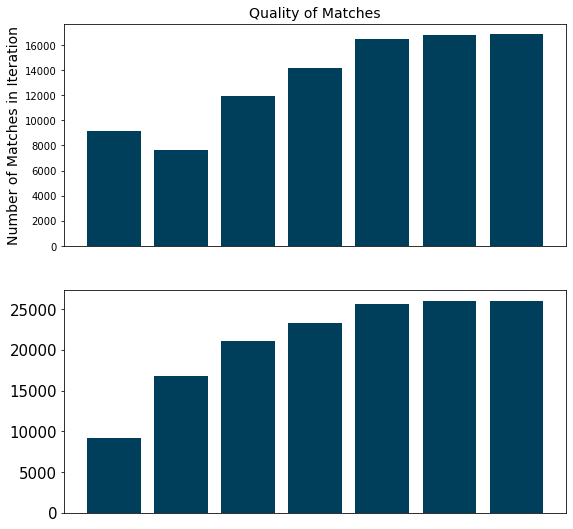

In [9]:
x = ["NONE", "AGENCY", '+AGE', '+RACE', '+Language', '+Access30Transit', '+lowwagelaborforce']
y1 = [9130, 7614, 11950, 14126, 16455, 16815, 16854] 
y2 = [9130, 16744, 21080, 23256, 25585, 25945, 25984]


f, ax = plt.subplots(ncols = 1, nrows = 2, gridspec_kw = {'width_ratios':[.51]}, figsize=(9,9))
ax[0].set_ylabel('Number of Matches in Iteration', fontsize=14)
ax[0].set_xticklabels(labels=x, rotation=90)
ax[0].set_xlabel('Covariate(s) Dropped', fontsize=14)
ax[0].set_title('Quality of Matches', fontsize=14)
ax[0].bar(x,y1, color = '#003f5c')
ax[0].axes.xaxis.set_visible(False)

# ax[1].set_ylabel('Number of Matches Made', fontsize=22)
ax[1].set_xlabel('Covariate(s) Dropped', fontsize=30)
# ax[1].set_title('Quality of Matches', fontsize=30)
ax[1].bar(x,y2, color = '#003f5c')
ax[1].tick_params(axis="y", labelsize=15)
ax[1].axes.xaxis.set_visible(False)

In [8]:
# ATE Overall.
ate_AMT = dame_flame.utils.post_processing.ATE(model_flame_AMT)
ate_AMT

0.21115267046953873

In [ ]:
# As we can see, the ATE is slightly positive, 
# implying that the subsidized annual pass (SAP) causes an enroller 
# to enroll more than non-SAP recipients by this many more times.

In [126]:
group1 = model_flame_AMT.units_per_group[1]
s_mmg = match_all.loc[group1]
s_mmg # each row of group 1.

,RaceDesc,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,SAP,Agency,Language,Age_bin,count_enroll
2675,0,3,1,1,1,0,1,0,0,0,2
2682,0,3,1,1,1,0,0,0,0,0,2
2683,0,3,1,1,1,0,0,0,0,0,2
9864,0,3,1,1,1,0,0,0,0,0,2
14624,0,3,1,1,1,0,0,0,0,0,1


In [127]:
s_mmg.iloc[0]["RaceDesc"] == 0 # color all group numbers of this group.


True

In [9]:
def create_df_scatter(feature, category):
    '''
    Creates a scatter plot of the size of matched group against CATE estimate.
    Note: the model name and dataframe are specified below 
    (make sure to change for different models and dataframe).
    
    feature (str): variable of interest.
    category (int): level of variable to highlight.
    '''
    group_size_overall = []
    cate_of_group = []
    in_desired_variable = []
    size_desired_group = []
    cate_desired_group = []
    

    for group in model_flame_AMT.units_per_group:

        # find len of just treated units
        df_mmg = match_all.loc[group] # chooses rows with row id in group.
        treated = df_mmg.loc[df_mmg["SAP"] == 1] # chooses the rows with treatment = 1
        desired_variable = df_mmg.iloc[0][feature] == category # true/false vector. an indicator.

        # group_size_treated.append(len(treated))
        group_size_overall.append(len(group))
        in_desired_variable.append(desired_variable)
        
        

        cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_AMT, group[0]))
        
        if desired_variable == True:
            cate_desired_group.append(dame_flame.utils.post_processing.CATE(model_flame_AMT, group[0]))
            size_desired_group.append(len(group))
        
    
    return(group_size_overall, cate_of_group, in_desired_variable, size_desired_group, cate_desired_group)


In [10]:
def create_cate_lst(sizes, cates):
    '''
    helper function to create credible interval for ATE. Creates an extended list
    where each element is the CATE for a unit.'''
    
    out = []
    for i in range(len(cates)):
        for j in range(sizes[i]):
            out.append(cates[i])
    return out 

### Scatter Plot Displaying CATES of re-enrollment

In [11]:
# Calculate the quantiles for ATE.
(size, cate_all, in_asian, size_asian, cate_asian) = create_df_scatter("RaceDesc", 2)

cate_lst = create_cate_lst(size, cate_all)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)
mean_cate

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, ub)  

0.20349544619248539 0.21880989474659346


Text(0, 0.5, 'CATE')

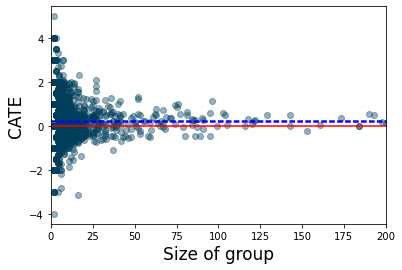

In [12]:
plt.scatter(size, cate_all, c = "#003f5c", alpha=0.4)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.axhline(y=lb, color='b', linestyle='--')
plt.axhline(y=ub, color='b', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=12)
plt.ylabel('Estimated Treatment Effect of Group', fontsize=12)
# plt.title("Visualizing Enrollment CATE of matched groups by size", fontsize=14)

plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('ate_scatter_enrollment.pdf', bbox_inches="tight")

In [15]:
# Here are the corresponding codes for race = {"White": 0, "Black or African American": 1, "Asian": 2, "Hispanic or Latino": 3, "Not Specified": 4, 'Other': 5, 'American Indian or Alaska Native': 6, "Multi-Racial": 7, "Native Hawaiian or Other Pacific Islander": 8}
(size, cate_all, in_asian, size_asian, cate_asian) = create_df_scatter("RaceDesc", 2)


In [16]:
## Conf. Interval
## Conf. Interval for Matched groups with Asian Individuals
cate_lst = create_cate_lst(size_asian, cate_asian)

mean_cate = sum(cate_lst)/len(cate_lst)
mean_cate

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, ub)  

0.3470227659767201 0.37386033641714034


In [24]:

q025 = np.percentile(cate_test, 2.5) # return 50th percentile, e.g median.
q975 = np.percentile(cate_test, 97.5)
print (q025, q975)

-0.25 1.25


Text(0, 0.5, 'CATE')

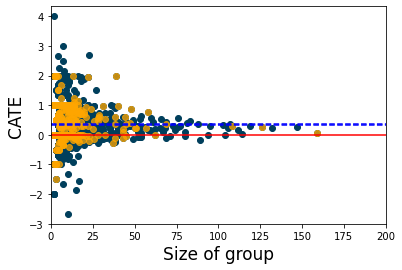

In [17]:
# Scatterplot Displaying the CATE of matched groups with Asian Individuals

cors = {True:'#bc5090', False:'#ffa600'}
asian = pd.Series(in_asian)

plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_asian, cate_asian, c = "#ffa600", alpha=.75)

plt.axhline(y=0.0, color='r', linestyle='-')
plt.axhline(y=lb, color='blue', linestyle='--')
plt.axhline(y=ub, color='blue', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('asian_enroll.pdf', bbox_inches="tight")

### Scatter for AccesstoTransit

In [15]:
# Calculate the quantiles for Lowest transit Quantile.
(size, cate_all, in_trans1, size_trans1, cate_trans1) = create_df_scatter("Access30Transit_quantileNum_4q", 0)

cate_lst = create_cate_lst(size_trans1, cate_trans1)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, mean_cate, ub)  

0.14660133630470015 0.16065981829744722 0.17471830029019428


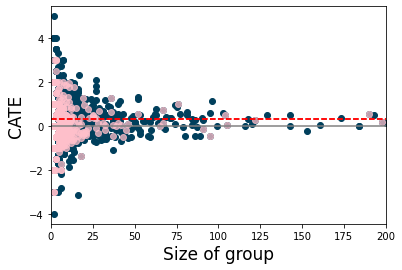

In [34]:
# Scatterplot Displaying the CATE of matched groups with transit1 individuals.
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_trans1, cate_trans1, c = "pink", alpha=.75)

plt.axhline(y=0.0, color='grey', linestyle='-')
plt.axhline(y=lb, color='red', linestyle='--')
plt.axhline(y=ub, color='red', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('trans1_enroll.pdf', bbox_inches="tight")

In [18]:
# Calculate the quantiles for Highest transit quantile.
(size, cate_all, in_trans3, size_trans3, cate_trans3) = create_df_scatter("Access30Transit_quantileNum_4q", 3)

cate_lst = create_cate_lst(size_trans3, cate_trans3)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, mean_cate, ub)  

0.3016070140550001 0.3152472491746564 0.3288874842943127


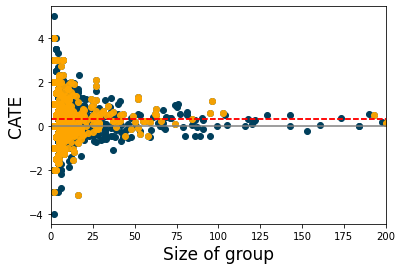

In [35]:
# Scatterplot Displaying the CATE of matched groups with transit3 individuals.
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_trans3, cate_trans3, c = "#ffa600", alpha=0.95)

plt.axhline(y=0.0, color='gray', linestyle='-')
plt.axhline(y=lb, color='red', linestyle='--')
plt.axhline(y=ub, color='red', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('trans3_enroll.pdf', bbox_inches="tight")

In [24]:
# For each unit, we can see a table displaying the covariates it was matched on.
matched = model_flame_AMT.df_units_and_covars_matched
matched[:15]

,RaceDesc,OverallJobAccess_quantileNum_4q,lowwagelaborforce_quantileNum_4q,Access30Transit_quantileNum_4q,Access30Transit_ts_quantileNum_4q,spatialmismatch_quantileNum_4q,Agency,Language,Age_bin
0,*,*,3,3,3,2,3,0,*
1,1,3,3,3,3,2,3,0,3
2,*,*,3,3,3,2,*,0,*
3,1,3,3,3,3,2,0,0,4
4,3,3,3,3,3,2,3,0,2
5,1,3,3,3,3,2,0,0,3
6,0,3,3,3,3,2,3,0,4
7,1,3,3,3,3,2,0,0,0
8,*,*,3,3,3,2,*,0,*
9,0,3,3,3,3,2,0,0,4


### Scatter for OverallJobAccess

In [25]:
# Calculate the quantiles for Lowest Overall Job Access Quantile.
(size, cate_all, in_Ja1, size_Ja1, cate_Ja1) = create_df_scatter("OverallJobAccess_quantileNum_4q", 0)

cate_lst = create_cate_lst(size_Ja1, cate_Ja1)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, mean_cate, ub) 

0.1407913827251626 0.15645244687767687 0.17211351103019115


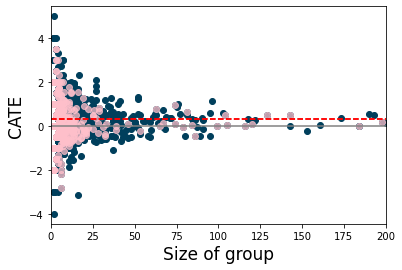

In [31]:
# Scatterplot Displaying the CATE of matched groups with Ja1 individuals.
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_Ja1, cate_Ja1, c = "pink", alpha=.75)

plt.axhline(y=0.0, color='grey', linestyle='-')
plt.axhline(y=lb, color='red', linestyle='--')
plt.axhline(y=ub, color='red', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('Ja1_enroll.pdf', bbox_inches="tight")

In [27]:
# Calculate the quantiles for Highest Overall Job Access Quantile.
(size, cate_all, in_Ja3, size_Ja3, cate_Ja3) = create_df_scatter("OverallJobAccess_quantileNum_4q", 3)

cate_lst = create_cate_lst(size_Ja3, cate_Ja3)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, mean_cate, ub) 

0.30582260391597244 0.3190329743177717 0.332243344719571


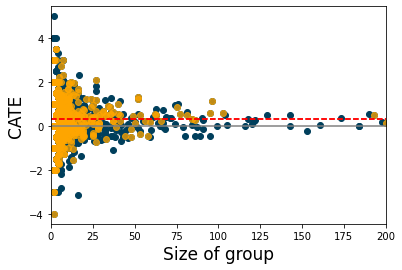

In [32]:
# Scatterplot Displaying the CATE of matched groups with Ja1 individuals.
plt.scatter(size, cate_all, c = "#003f5c", alpha=1)
plt.scatter(size_Ja3, cate_Ja3, c = "#ffa600", alpha=.75)

plt.axhline(y=0.0, color='grey', linestyle='-')
plt.axhline(y=lb, color='red', linestyle='--')
plt.axhline(y=ub, color='red', linestyle='--')
plt.xlim(0,200)
plt.xlabel('Size of group', fontsize=17)
plt.ylabel('CATE', fontsize=17)

# plt.savefig('Ja3_enroll.pdf', bbox_inches="tight")

# Exact Matching

In [6]:
# Matching on all 9 covariates in the dataset.
model_flame_EX = dame_flame.matching.FLAME(repeats=False, verbose=3, early_stop_iterations=1, stop_unmatched_t = True, adaptive_weights='decisiontree', want_pe=True)


In [7]:
model_flame_EX.fit(holdout_data=False, treatment_column_name='SAP', outcome_column_name='count_enroll')
result_flame_EX = model_flame_EX.predict(match_all)

Iteration number:  1
	Number of matched groups formed in total:  1166
	Unmatched treated units:  5187 out of a total of  9068 treated units
	Unmatched control units:  13002 out of a total of  18251 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  9130
	Number of matches made so far:  9130
	In this iteration, the covariates dropped are:  set()
9130 units matched. We stopped before doing iteration number:  1


In [8]:
# ATE Overall Using Exacxt Matching.
ate_6 = dame_flame.utils.post_processing.ATE(model_flame_EX)
ate_6 # 0.304

0.3042368978425022

In [14]:
def create_df_scatter(feature, category):
    '''
    Creates a scatter plot of the size of matched group against CATE estimate.
    Note: the model name is specified below (make sure to change for different models).
    
    feature (str): variable of interest.
    category (int): level of variable to highlight.
    '''
    group_size_overall = []
    cate_of_group = []
    in_desired_variable = []
    size_desired_group = []
    cate_desired_group = []
    

    for group in model_flame_EX.units_per_group:

        # find len of just treated units
        df_mmg = match_all.loc[group] # chooses rows with row id in group.
        treated = df_mmg.loc[df_mmg["SAP"] == 1] # chooses the rows with treatment = 1
        desired_variable = df_mmg.iloc[0][feature] == category # true/false vector. an indicator.

        # group_size_treated.append(len(treated))
        group_size_overall.append(len(group))
        in_desired_variable.append(desired_variable)
        
        

        cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_EX, group[0]))
        
        if desired_variable == True:
            cate_desired_group.append(dame_flame.utils.post_processing.CATE(model_flame_EX, group[0]))
            size_desired_group.append(len(group))
        
    
    return(group_size_overall, cate_of_group, in_desired_variable, size_desired_group, cate_desired_group)

In [15]:
# Calculate the quantiles for ATE.
(size, cate_all, in_asian, size_asian, cate_asian) = create_df_scatter("RaceDesc", 2)

cate_lst = create_cate_lst(size, cate_all)

## Conf. Interval
mean_cate = sum(cate_lst)/len(cate_lst)
mean_cate

# normal approximation
lb = mean_cate - 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
ub = mean_cate + 1.96*(np.std(cate_lst) / np.sqrt(len(cate_lst)))
print(lb, ub) 

0.29334508716879304 0.3151287085162162


The ATE results from exact matching are 0.30 [0.29 0.32].